**Overview and problem statement:**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

In [1]:
from google.colab import files
files.upload()

Saving Country-data.csv to Country-data.csv


{'Country-data.csv': b'country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp\r\nAfghanistan,90.2,10,7.58,44.9,1610,9.44,56.2,5.82,553\r\nAlbania,16.6,28,6.55,48.6,9930,4.49,76.3,1.65,4090\r\nAlgeria,27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460\r\nAngola,119,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530\r\nAntigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200\r\nArgentina,14.5,18.9,8.1,16,18700,20.9,75.8,2.37,10300\r\nArmenia,18.1,20.8,4.4,45.3,6700,7.77,73.3,1.69,3220\r\nAustralia,4.8,19.8,8.73,20.9,41400,1.16,82,1.93,51900\r\nAustria,4.3,51.3,11,47.8,43200,0.873,80.5,1.44,46900\r\nAzerbaijan,39.2,54.3,5.88,20.7,16000,13.8,69.1,1.92,5840\r\nBahamas,13.8,35,7.89,43.7,22900,-0.393,73.8,1.86,28000\r\nBahrain,8.6,69.5,4.97,50.9,41100,7.44,76,2.16,20700\r\nBangladesh,49.4,16,3.52,21.8,2440,7.14,70.4,2.33,758\r\nBarbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000\r\nBelarus,5.5,51.4,5.61,64.5,16200,15.1,70.4,1.49,6030\r\nBelgium,4.5,76.4,10.7,74.7,

In [19]:
!ls

Country-data.csv  sample_data


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
countrydata = pd.read_csv('Country-data.csv')
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
countrydata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [14]:
countrydata.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

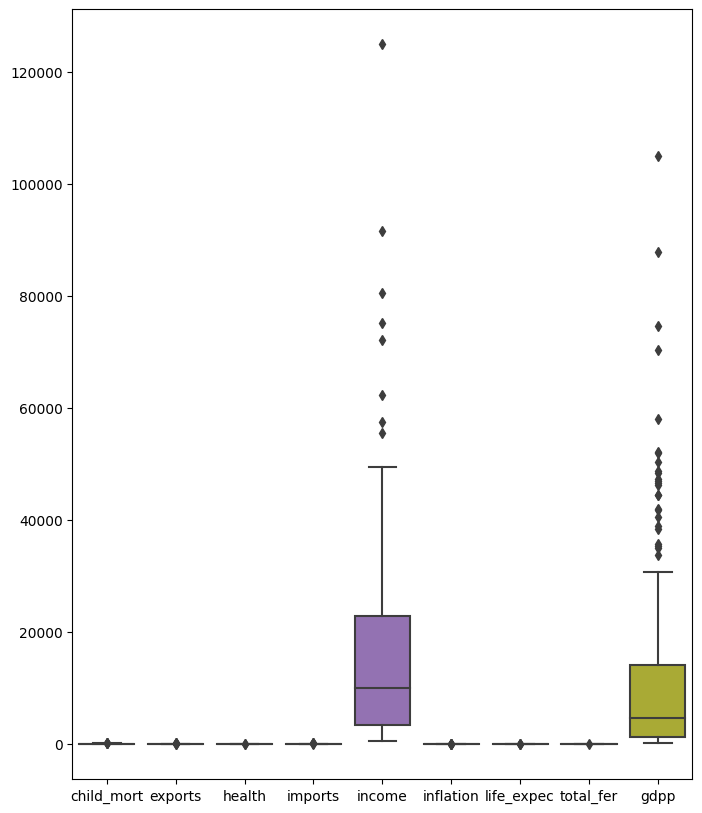

In [18]:
fig = plt.figure(figsize=(8, 10))
sns.boxplot(countrydata)
plt.show()

In [48]:
countrydata.shape

(167, 10)

In [49]:
countrydata.income.idxmax()

123

In [50]:
countrydata.loc[123, 'income']

125000

#### Dropping two highest outliers from the income column (Not remoing all theoutliers as we will lose important information)

In [51]:
countrydata_droped = countrydata.drop(123)
countrydata_droped.shape

(166, 10)

In [52]:
countrydata_droped.income.idxmax()

91

In [53]:
countrydata_droped = countrydata_droped.drop(91)
countrydata_droped.shape

(165, 10)

#### Dropping two highest outliers from the gdpp column

In [54]:
countrydata_droped.gdpp.idxmax()

114

In [55]:
countrydata_droped = countrydata_droped.drop(114)
countrydata_droped.shape

(164, 10)

In [56]:
countrydata_droped.gdpp.idxmax()

145

In [57]:
countrydata_droped = countrydata_droped.drop(145)
countrydata_droped.shape

(163, 10)

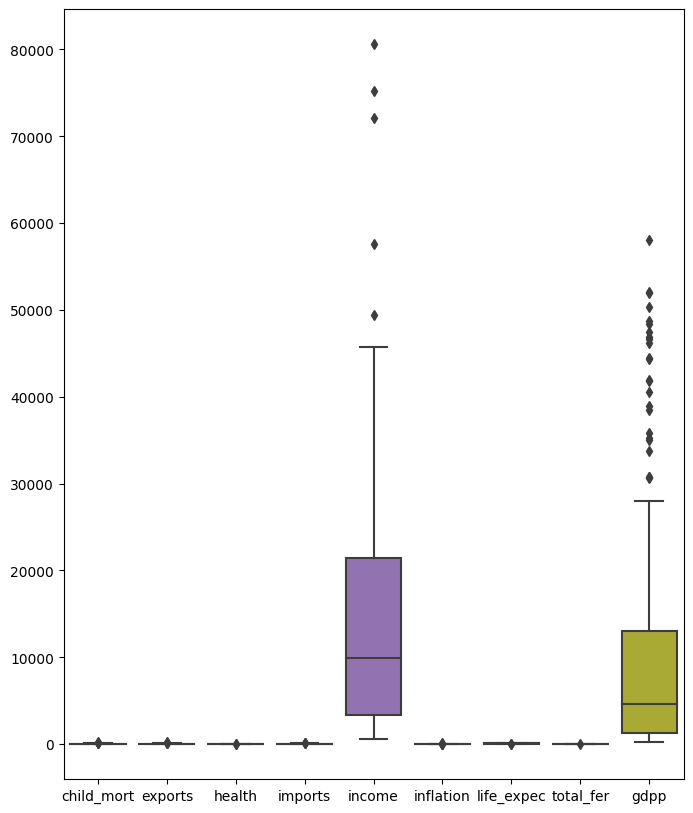

In [59]:
# Plotting box plot after the outlier removal
fig = plt.figure(figsize=(8, 10))
sns.boxplot(countrydata_droped)
plt.show()

In [60]:
countrydata_droped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [86]:
features = countrydata_droped.drop('country', axis = 1)
countries = countrydata_droped.country
print(features.head())
print(countries.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object


#### Scaling all the features

In [65]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data.shape

(163, 9)

In [68]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8
0,1.266659,-1.179421,0.289459,-0.070077,-0.881403,0.147551,-1.598714,1.875433,-0.736757
1,-0.557354,-0.472376,-0.090563,0.089790,-0.353953,-0.317456,0.680403,-0.874719,-0.492243
2,-0.292179,-0.063860,-0.968673,-0.653372,-0.165669,0.773197,0.703081,-0.056928,-0.466665
3,1.980404,0.874939,-1.455692,-0.156491,-0.609437,1.365024,-1.156498,2.099666,-0.530956
4,-0.713486,0.215030,-0.282419,0.534822,0.227382,-0.603975,0.737098,-0.558155,0.068403


In [69]:
# Calculating the Hopkins statistics 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [71]:
print(hopkins(scaled_data))

0.8719902320707753


## Using K-means clusturing

In [72]:
from sklearn.cluster import KMeans

In [ ]:
help(KMeans)

In [74]:
# Using elbo-curve technique to determine the number of clusters
ssd = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for clustures in n_clusters:
  kmeans = KMeans(n_clusters = clustures, max_iter=50, n_init='auto')
  kmeans.fit(scaled_data)
  ssd.append(kmeans.inertia_)

ssd

[1015.256108546341,
 794.9628986399382,
 720.1055990877617,
 643.2022856772766,
 593.720825647652,
 487.8845709249557,
 455.2907285562229]

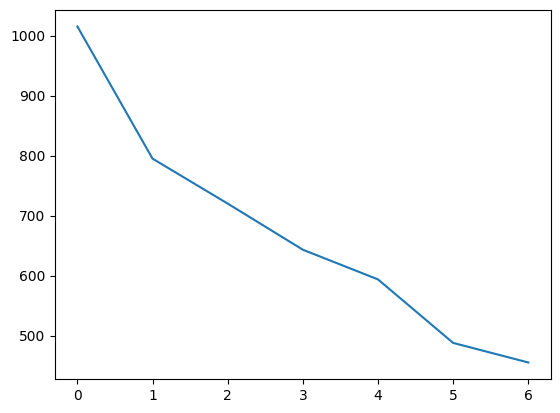

In [75]:
plt.plot(ssd)
plt.show()

#### As per elbo curve 4 is the number of clusters to be formed

In [76]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score

In [77]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for clusters in n_clusters:
  kmeans = KMeans(n_clusters = clusters, max_iter = 50, n_init='auto')
  kmeans.fit(scaled_data)

  silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
  print("The silhoutte score for cluster{0} is {1}".format(clusters, silhouette_avg))

The silhoutte score for cluster2 is 0.27824429791559524
The silhoutte score for cluster3 is 0.291216649344063
The silhoutte score for cluster4 is 0.23455656230682606
The silhoutte score for cluster5 is 0.2497217301552537
The silhoutte score for cluster6 is 0.21119537952920378
The silhoutte score for cluster7 is 0.2213910323938159
The silhoutte score for cluster8 is 0.22507910946202245


#### According to silhoutte scoreing there should be 3 clustures

In [78]:
# Applying k-means clusturing for 3 clustures
kmeans = KMeans(n_clusters = 3 , max_iter = 50, n_init='auto')
kmeans.fit(scaled_data)

KMeans(max_iter=50, n_clusters=3, n_init='auto')

In [79]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [89]:
# asigning labels to the countries
countries = pd.DataFrame(countries)
countries['cluster_id'] = kmeans.labels_
countries.head()

,country,cluster_id
0,Afghanistan,0
1,Albania,2
2,Algeria,2
3,Angola,0
4,Antigua and Barbuda,2


In [123]:
data_for_analysis = countrydata_droped[['country', 'income', 'child_mort', 'gdpp']]
data_for_analysis = pd.DataFrame(data_for_analysis)
data_for_analysis['cluster_id'] = kmeans.labels_
data_for_analysis.head()

,country,income,child_mort,gdpp,cluster_id
0,Afghanistan,1610,90.2,553,0
1,Albania,9930,16.6,4090,2
2,Algeria,12900,27.3,4460,2
3,Angola,5900,119.0,3530,0
4,Antigua and Barbuda,19100,10.3,12200,2


### Analysing the data according to the clusters by plotting

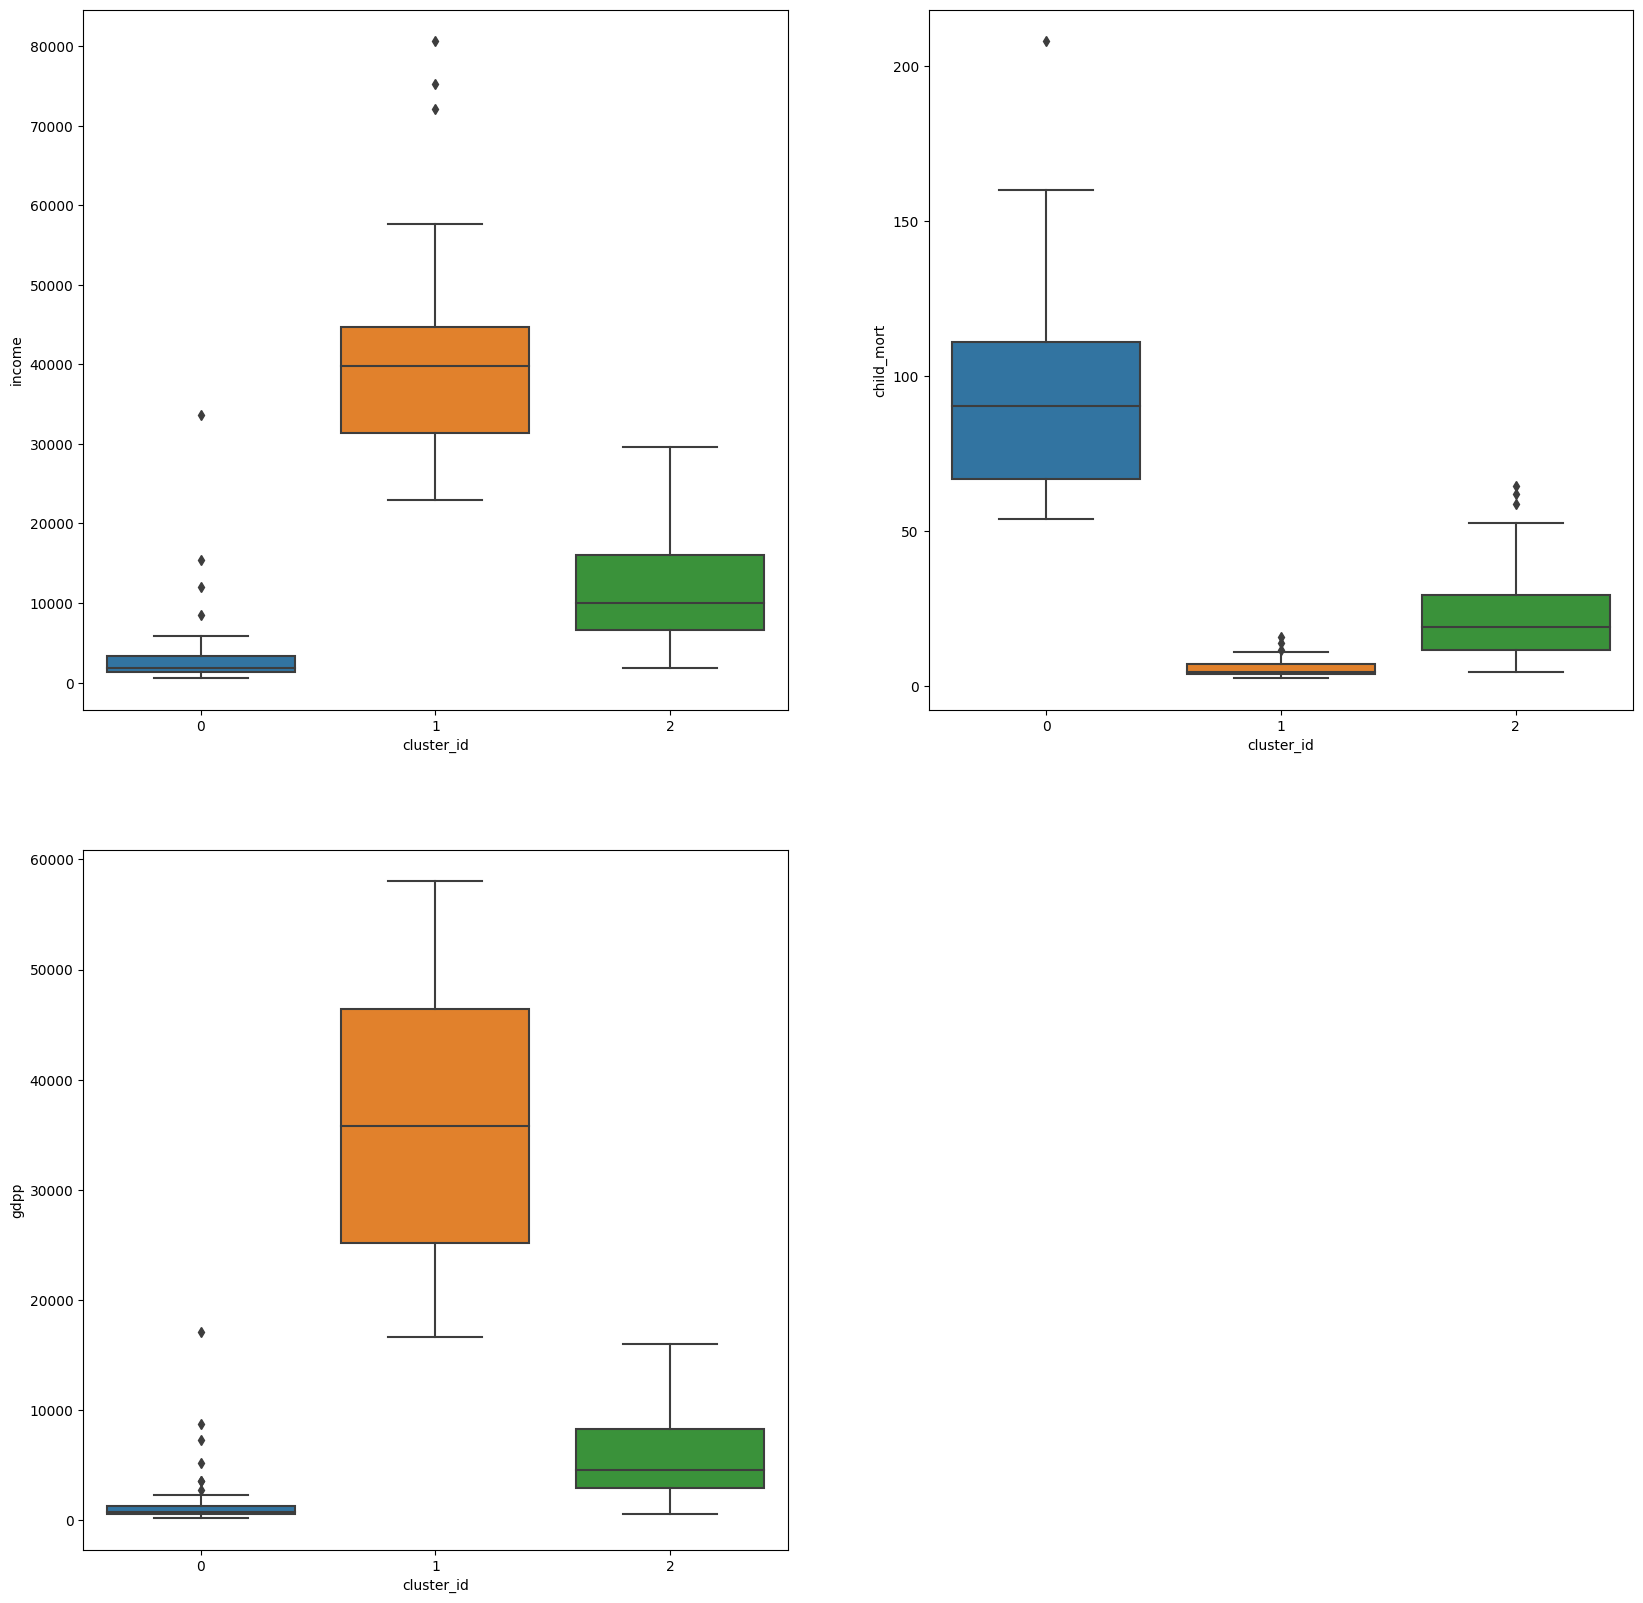

In [125]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='income', data=data_for_analysis)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='child_mort', data=data_for_analysis)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='gdpp', data=data_for_analysis)
plt.show()

In [100]:
plot_data = scaled_data[[0]]
plot_data = pd.DataFrame(plot_data)
plot_data.columns = ['child_mort']
plot_data['country'] = data_for_analysis['country']
plot_data['cluster id'] = data_for_analysis['cluster_id']
plot_data.head()

,child_mort,country,cluster id
0,1.266659,Afghanistan,0.0
1,-0.557354,Albania,2.0
2,-0.292179,Algeria,2.0
3,1.980404,Angola,0.0
4,-0.713486,Antigua and Barbuda,2.0


#### According to the above boxplots we can easily infer that clustur 0 contains the under-developed countries that need the help of the NGO

In [129]:
# List of countries that need help from the NGO
help_list = countries.loc[countries.cluster_id == 0, 'country'].values
print(help_list)

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati'
 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']


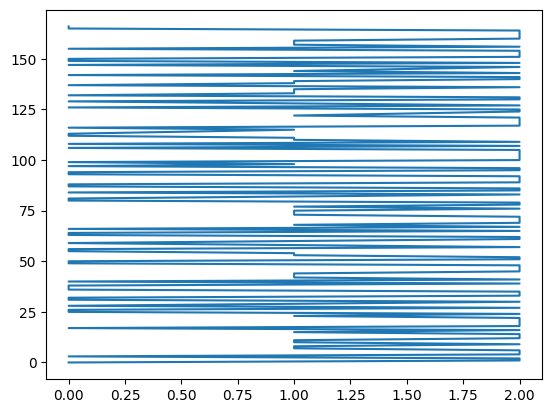

In [112]:
# Plotting one cluster for clear view
# plt.scatter(data_for_analysis['child_mort'], data_for_analysis.index, data_for_analysis['cluster_id'])
# plt.xlabel('Country')
# plt.ylabel('Child mortality')
# plt.title('K-means child mortality country clustures')
# plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if needed
# plt.tight_layout()  # Optional: Adjust spacing if needed
# plt.show()
plt.plot(data_for_analysis['cluster_id'], data_for_analysis.index)
plt.show()

## **Using Hierarchycal Clustering**

In [127]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

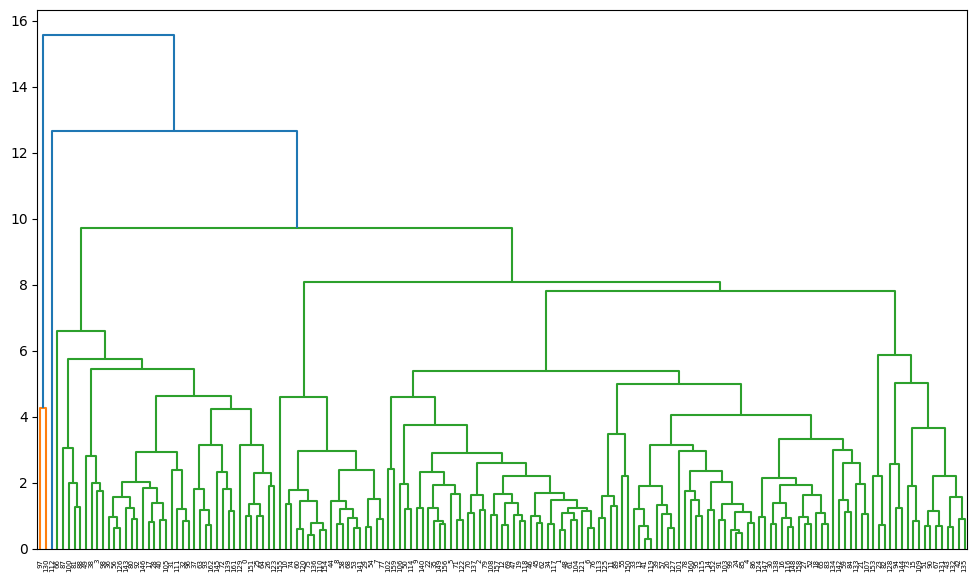

In [128]:
# single linkage
fig = plt.figure(figsize = (12, 7))
mergings = linkage(scaled_data, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [115]:
mergings.shape

(162, 4)

In [122]:
# There are visible three clustures
clusters = cut_tree(mergings, n_clusters=3)
np.unique(clusters)

array([0, 1, 2])

In [124]:
data_for_analysis_2 = countrydata_droped[['country', 'income', 'child_mort', 'gdpp']]
data_for_analysis_2 = pd.DataFrame(data_for_analysis_2)
data_for_analysis_2['cluster_id'] = clusters
data_for_analysis_2.head()

,country,income,child_mort,gdpp,cluster_id
0,Afghanistan,1610,90.2,553,0
1,Albania,9930,16.6,4090,0
2,Algeria,12900,27.3,4460,0
3,Angola,5900,119.0,3530,0
4,Antigua and Barbuda,19100,10.3,12200,0


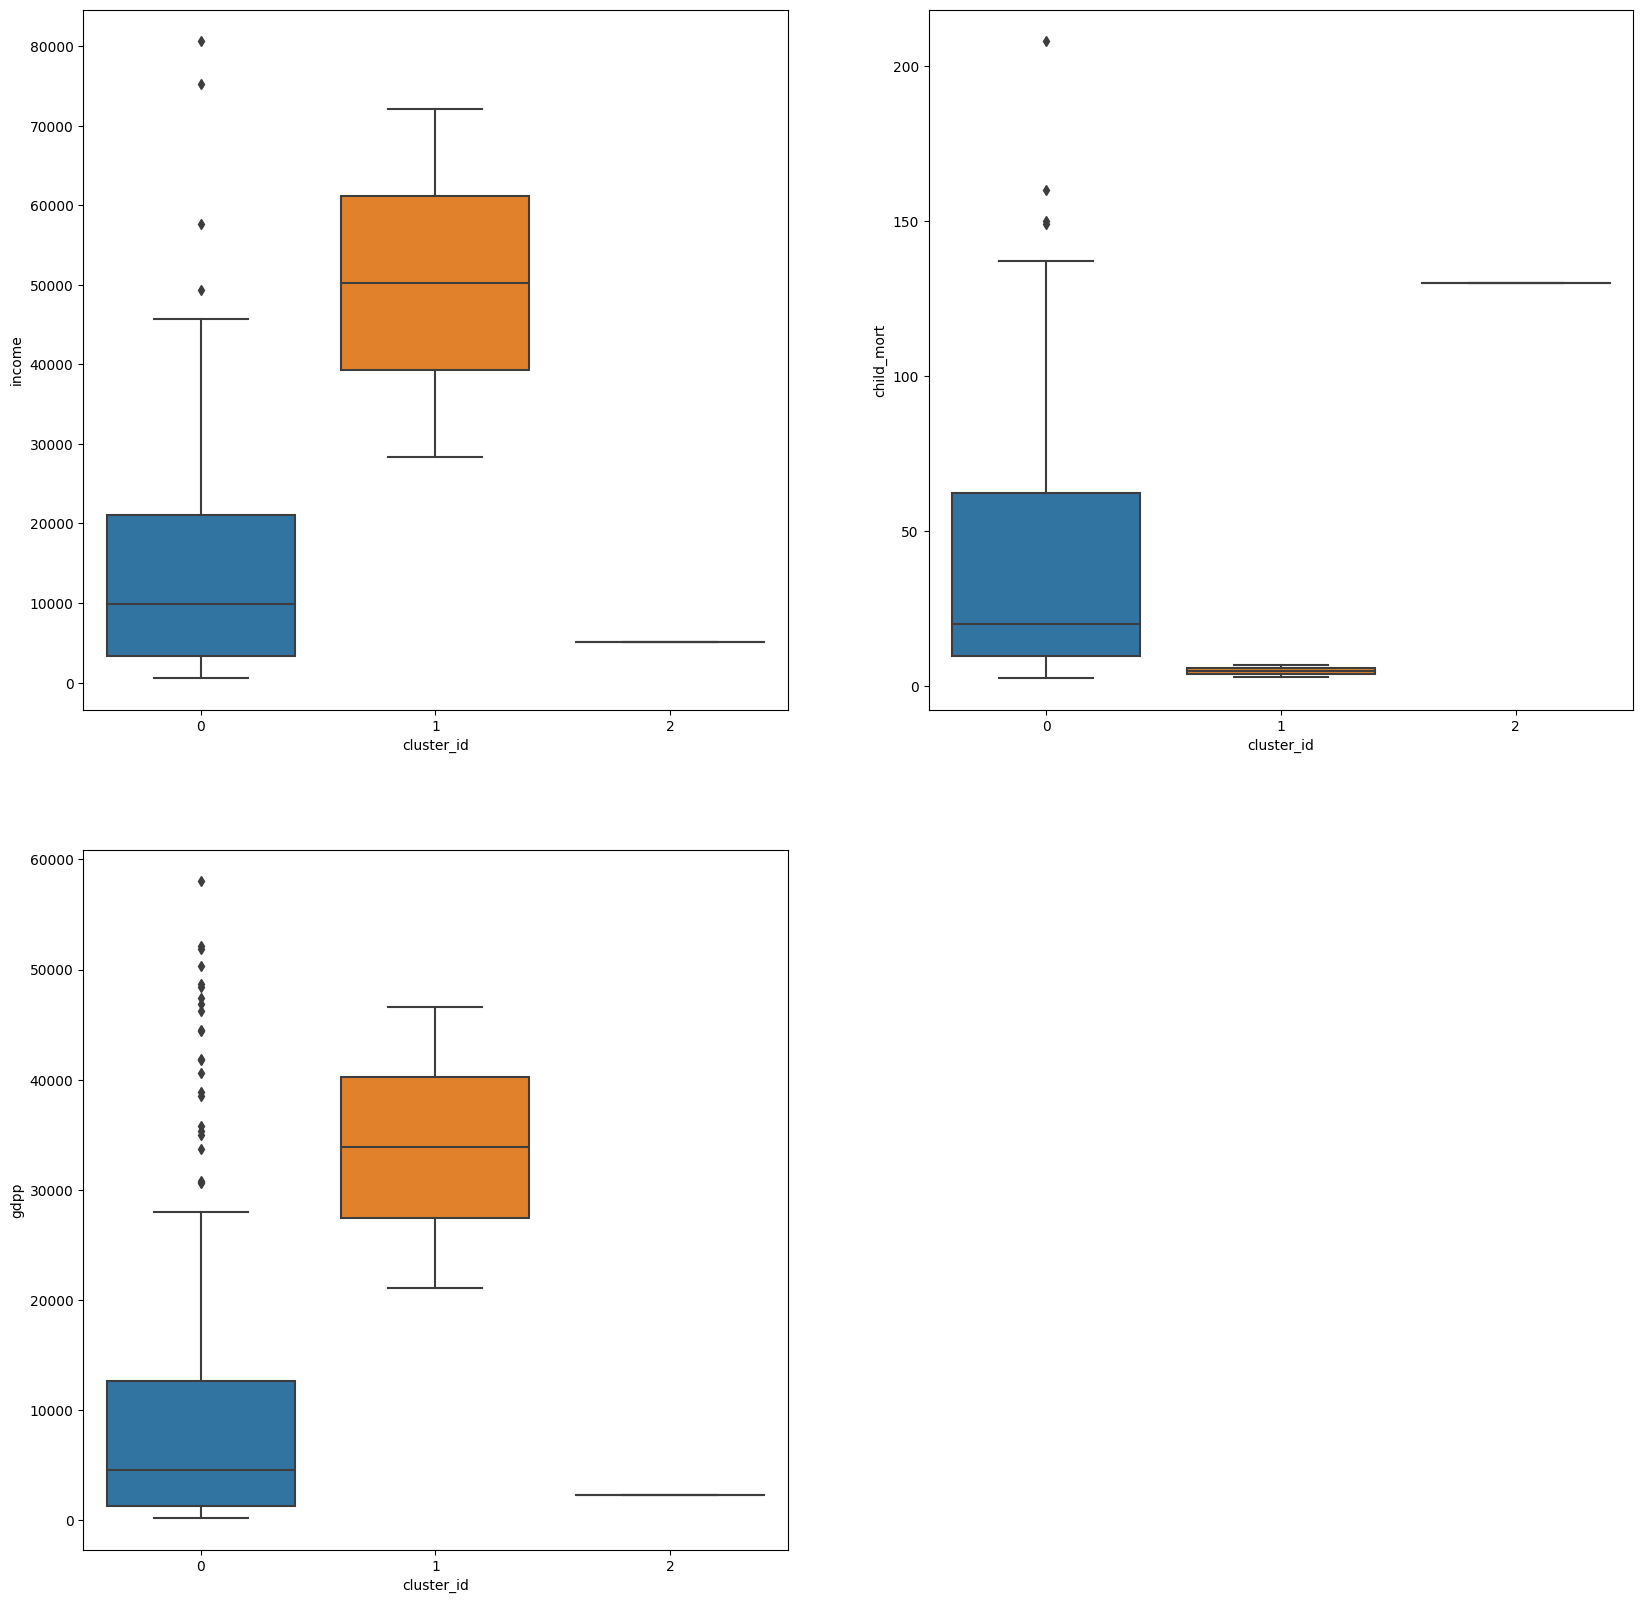

In [126]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='income', data=data_for_analysis_2)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='child_mort', data=data_for_analysis_2)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='gdpp', data=data_for_analysis_2)
plt.show()